In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.core.display import HTML,display
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [20]:
df.sample(5) 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
202,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
3713,ham,"Oh, i will get paid. The most outstanding one ...",NaN,NaN,NaN
2846,spam,Free-message: Jamster!Get the crazy frog sound...,NaN,NaN,NaN
2685,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
4090,ham,Hey doc pls I want to get nice t shirt for my ...,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [24]:
def missinginfo(df):
    a = round((df.isnull().mean()*100),2)
    mssingcolumn=[]
    missingdata=[]
    missingnum=[] 
    for i in range(len(a)):
        if a.values[i] != 0:
            mssingcolumn.append(a.keys()[i])
    for i in mssingcolumn:
        missingdata.append(round((df[i].isnull().mean()*100),2))
        missingnum.append(df[i].isnull().sum())
    missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
    return missing

In [25]:
missinginfo(df)

,column,missing percent,missing num
0,Unnamed: 2,99.10,5522
1,Unnamed: 3,99.78,5560
2,Unnamed: 4,99.89,5566


In [26]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [27]:
df.sample(5)

,v1,v2
326,ham,Hi da:)how is the todays class?
943,ham,And also I've sorta blown him off a couple tim...
2409,ham,Aww that's the first time u said u missed me w...
4370,ham,Purity of friendship between two is not about ...
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."


In [28]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [29]:
df.head(2) 

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [32]:
df.head() # 0 --> ham   and  1 --> spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
missinginfo(df) # no missing values

,column,missing percent,missing num


In [34]:
df.duplicated().sum()

403

In [35]:
df = df.drop_duplicates(keep='first')

In [36]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

## EDA

In [38]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

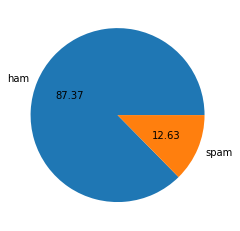

In [40]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [41]:
import nltk

In [42]:
df['num_characters'] = df['text'].apply(len) # show every sms's length

In [43]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
# number of words
df['num_words'] = df['text'].apply( lambda x:len(nltk.word_tokenize(x)) ) # words split

In [45]:
df.head() 

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
# sentenses break into small parts
df['text'].apply( lambda x:nltk.sent_tokenize(x) )

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [47]:
df['num_sentences'] = df['text'].apply( lambda x:len(nltk.sent_tokenize(x)) )

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [50]:
# descibe of ham sms
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [51]:
# descibe of spam sms
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


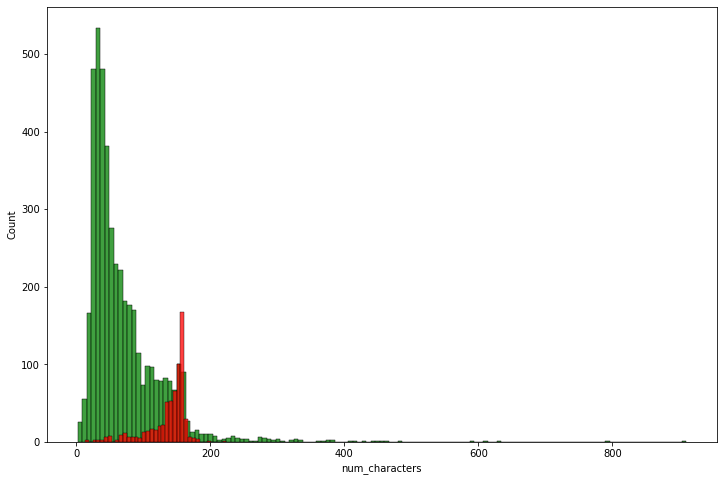

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

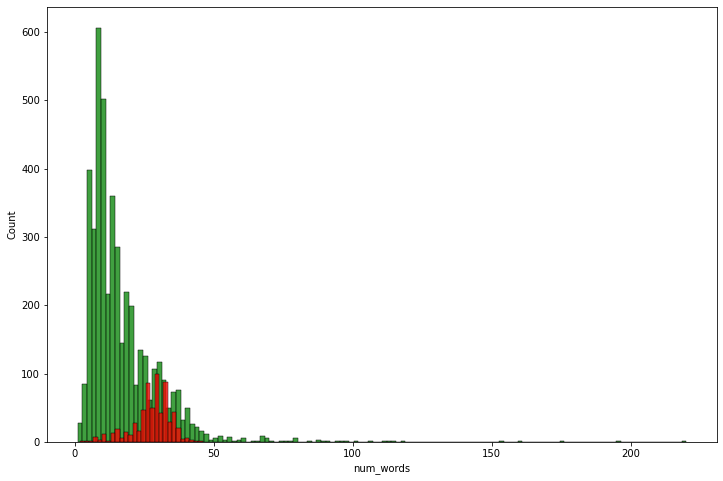

In [53]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

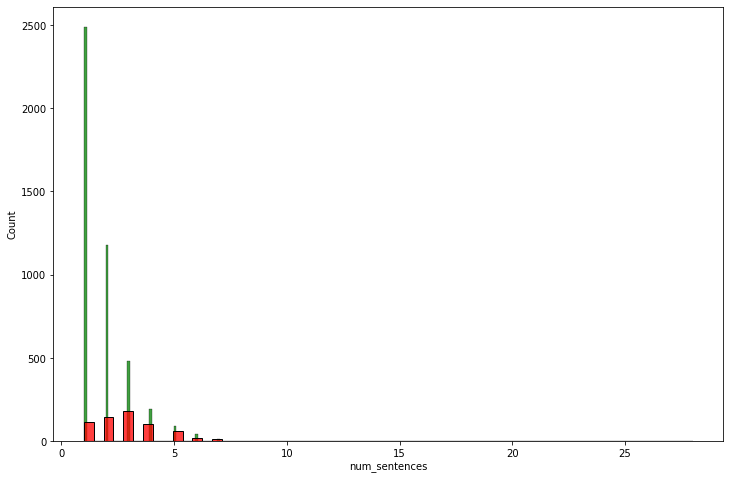

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()

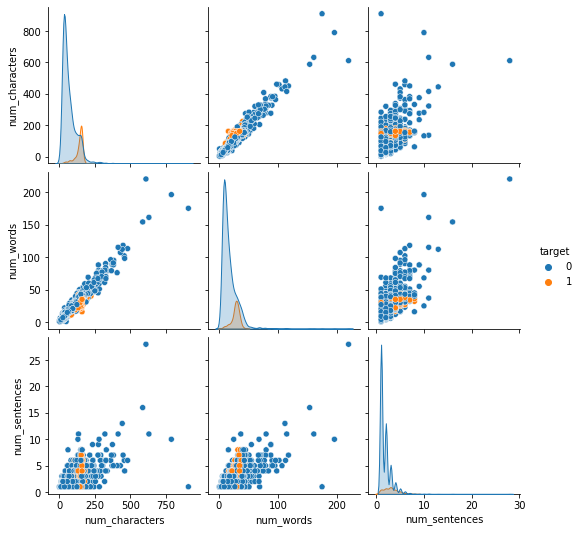

In [55]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

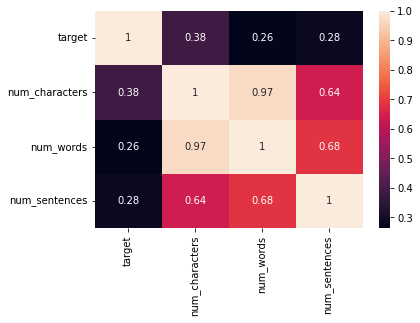

In [56]:
sns.heatmap(df.corr(),annot=True)

## Data Preprossing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [57]:
from nltk.corpus import stopwords
import string , nltk
from nltk.stem.porter import PorterStemmer

In [58]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def transform_text(text):
    #Lower case
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text) 
    
    #Removing special characters
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i)
    
    #Removing stop words and punctuation
    text = y[:] 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #Stemming (convert similar words to a specif word like dancing,dance,danced conver to danc)
    text = y[:] 
    y.clear()   
     
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    

    return " ".join(y)

In [61]:
transform_text('HI Hello HOw Are YOU I aM finE ThanKyou')

'hi hello fine thankyou'

In [62]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [63]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

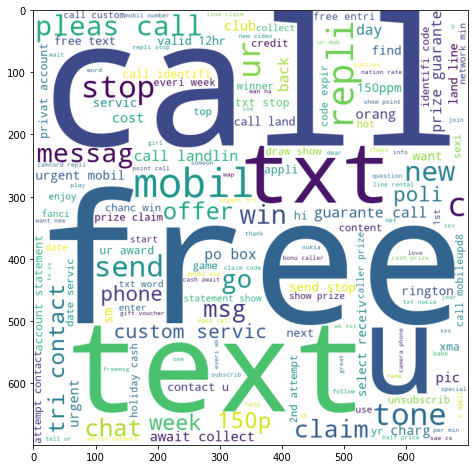

In [68]:
plt.figure(figsize=(14,8))
plt.imshow(spam_wc)
plt.show()

In [69]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

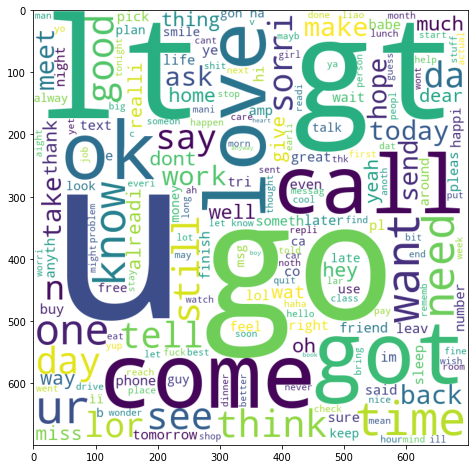

In [70]:
plt.figure(figsize=(14,8))
plt.imshow(ham_wc)
plt.show()

In [71]:
# store all spam words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)       

In [72]:
len(spam_corpus)

9939

In [73]:
# top 30 words of most spam words
from collections import Counter
top_30_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_30_spam_words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


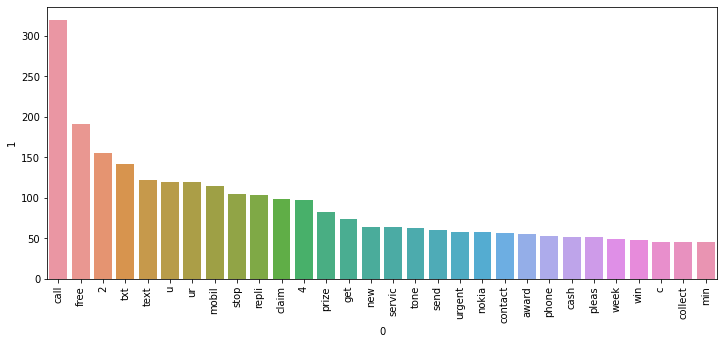

In [74]:
plt.figure(figsize=(12,5))
sns.barplot(top_30_spam_words[0],top_30_spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
# store all ham words
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)    

In [76]:
len(ham_corpus)

35394

In [77]:
# top 30 words of most ham words
from collections import Counter
top_30_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
top_30_ham_words.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


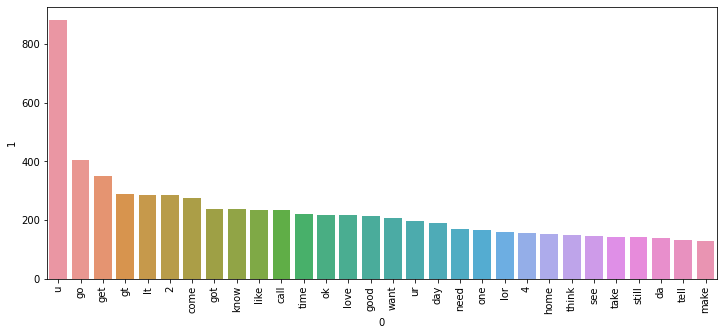

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(top_30_ham_words[0],top_30_ham_words[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

###### we will use generally naive bayes coz, naive bayes is genrally perform good for textual data

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # this is hit and trail 

In [80]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X.shape 

(5169, 3000)

In [82]:
y = df['target'].values

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
df['transformed_text'][0] 

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [90]:
len(X)

5169

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score is ',accuracy_score(y_test,y_pred1))
print('Precsison score is ',precision_score(y_test,y_pred1))
print('\nConfusion matrix \n',confusion_matrix(y_test,y_pred1))

Accuracy score is  0.8704061895551257
Precsison score is  0.509090909090909

Confusion matrix 
 [[788 108]
 [ 26 112]]


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score is ',accuracy_score(y_test,y_pred2))
print('Precsison score is ',precision_score(y_test,y_pred2))
print('\nConfusion matrix \n',confusion_matrix(y_test,y_pred2))

Accuracy score is  0.971953578336557
Precsison score is  1.0

Confusion matrix 
 [[896   0]
 [ 29 109]]


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy score is ',accuracy_score(y_test,y_pred3))
print('Precsison score is ',precision_score(y_test,y_pred3))
print('\nConfusion matrix \n',confusion_matrix(y_test,y_pred3))

Accuracy score is  0.9835589941972921
Precsison score is  0.991869918699187

Confusion matrix 
 [[895   1]
 [ 16 122]]


###### we will consider mutinomial naive bayes coz, it precison score is 1 ...we need fouse on precison score thats why we choose multinomial NB

In [72]:
import pickle

In [73]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb ,open('model.pkl','wb'))